## Import Packages

In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import wget
import itertools
import timeit
import pygrib

import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from datetime import datetime
from datetime import timedelta

from datablock import *
from datavis import *

datadir = '/home/q1park/mesocyclones/data_validation/'

In [2]:
soundings = pd.read_csv(datadir + 'list_soundings.csv', dtype = str, index_col = 0)
soundings['datetime'] = soundings['datetime'].apply(lambda x: str2dt(x))
soundings['lon'] = soundings['lon'].apply(lambda x: float(x))
soundings['lat'] = soundings['lat'].apply(lambda x: float(x))
soundings

,datetime,lon,lat,loc
05032220i_t.ays,2005-03-22 20:00:00,-82.35,31.32,waycrossga
05032220m_t.aby,2005-03-22 20:00:00,-84.19,31.54,albanyga
07050423.LMN,2007-05-04 23:00:00,-97.48,36.62,lamontok
08020600.LZK,2008-02-06 00:00:00,-92.29,34.75,littlerockar
08061200.TOP,2008-06-12 00:00:00,-95.81,39.09,topekaks
09021100.FWD,2009-02-11 00:00:00,-97.30,32.83,ftworthtx
14061619.OAX,2014-06-19 19:00:00,-95.93,41.26,omahane


In [3]:
model = 'rucanl'
version = ['rap', 'ruc2anl', 'ruc2']
res = ['130', '252']
ext = ['grb2', 'grb']

specs = list(itertools.product(version, res, ext))
specs = sorted(specs, key=lambda tup: tup[1])
specs[:3]

[('rap', '130', 'grb2'), ('rap', '130', 'grb'), ('ruc2anl', '130', 'grb2')]

In [4]:
sndmenu = gribmenu()

# for file, row in soundings.iterrows():
#     getmenu = gribmenu()
#     getmenu.createmenu(model, soundings.loc[file])
    
#     for spec in specs:
#         if spec[0] in getmenu.menu['name'].values and \
#         spec[1] in getmenu.menu['res'].values and \
#         spec[2] in getmenu.menu['ext'].values:
#             getmenu.filtermenu(name=spec[0], res=spec[1], ext=spec[2], fchr=0)
#             break
#     if len(getmenu.menu) == 1:
#         sndmenu.menu.loc[file] = getmenu.menu.loc[0]
#     else:
#         print("none found for ", file)

sndmenu.loadmenu(datadir + 'validation.gribmenu')
sndmenu.menu

,name,res,datetime,fchr,ext,url
05032220i_t.ays,ruc2,252,2005-03-22 20:00:00,0,grb.grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20050...
05032220m_t.aby,ruc2,252,2005-03-22 20:00:00,0,grb.grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20050...
07050423.LMN,ruc2anl,130,2007-05-04 23:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20070...
08020600.LZK,ruc2,252,2008-02-06 00:00:00,0,grb.grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20080...
08061200.TOP,ruc2,252,2008-06-12 00:00:00,0,grb.grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20080...
09021100.FWD,ruc2anl,130,2009-02-11 00:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20090...
14061619.OAX,rap,130,2014-06-19 19:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20140...


In [5]:
for tag, row in sndmenu.menu.iterrows():
    file = sndmenu.menuselect(index = tag, datetime = row['datetime'] )
    
    if not os.path.exists(datadir + file):
        wget.download(row['url'], datadir)
    else:
        print("already downloaded: ", file)
    
    if row['ext']=='grb':
        if not os.path.exists(datadir + file + '.grb2'):
            grbconvert(datadir, file)
            sndmenu.menu.at[tag, 'ext'] = 'grb.grb2'
        else:
            print("already converted: ", file)
            sndmenu.menu.at[tag, 'ext'] = 'grb.grb2'
        

already downloaded:  ruc2_252_20050322_2000_000.grb.grb2
already downloaded:  ruc2_252_20050322_2000_000.grb.grb2
already downloaded:  ruc2anl_130_20070504_2300_000.grb2
already downloaded:  ruc2_252_20080206_0000_000.grb.grb2
already downloaded:  ruc2_252_20080612_0000_000.grb.grb2
already downloaded:  ruc2anl_130_20090211_0000_000.grb2
already downloaded:  rap_130_20140619_1900_000.grb2


In [6]:
#sndmenu.savemenu(datadir + 'validation.gribmenu')
#sndmenu.menu

In [7]:

# for i, tag in enumerate(sndmenu.menu.index):
#     snd = sndmenu.menu.index[i]
#     sndlon, sndlat = soundings.loc[snd, 'lon'], soundings.loc[snd, 'lat']

#     res = 0.025
#     gridbnd = np.array([[int(sndlon-2), int(sndlon+2)], 
#                         [int(sndlat-2), int(sndlat+2)]])

#     gribfile = sndmenu.menuselect(index = snd ) 
#     #grib = pygrib.open(datadir + gribfile )
#     sndblocks = wxblocks(gridbnd, res)
#     sndblocks.grb2raw(gribfile, datadir)
    
#     sndblocks.raw2hdf(datadir + snd + '.hdf5')


In [8]:
def sounding_comparison(dictunits, dictsim, dictspc):
    nr, nc = 3,2

    plotnames = np.array(list(dictsim.keys())[:-1]).reshape(nr, nc)
    ylabels = np.vectorize(dictunits.get)(plotnames)
    xlabels = np.array([[r'Pressure $mb$']*nc]*nr)

    fig, axes = plt.subplots(nrows=nr, ncols=nc, sharex=True, sharey=False, figsize=(nc*6, nr*4))
    pad = 5 # in points

    for ax, name, ylabel, xlabel in zip(axes.ravel(), plotnames.ravel(), 
                                        ylabels.ravel(), xlabels.ravel()):
    
        ax.annotate(name, xy=(0.5, 1.025), xytext=(0, pad),
                    xycoords='axes fraction', textcoords='offset points',
                    size='xx-large', ha='center', va='baseline');
        ax.annotate(ylabel, xy=(0., 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='center', va='center', rotation=90);
        ax.annotate(xlabel, xy=(0.5, 0.), xytext=(0, pad),
                    xycoords='axes fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline');
    
        simY, simX = dictsim.get(name), dictsim.get('PRES')
        spcY, spcX = dictspc.get(name), dictspc.get('PRES')
    
        leg1 = ax.plot(spcX[spcY>-8888.], spcY[spcY>-8888.], color="red")
        leg2 = ax.plot(simX, simY, color="blue")
    
    fig.subplots_adjust(wspace=0.3, hspace=0.25, top=0.95);

    lines = (leg2[0], leg1[0])
    legendkey = ("RAP Grid Data", "Actual Sounding")
      
    fig.legend(lines, legendkey, loc=(0.29,0.55), borderaxespad=0.5, title="Sounding Comparison")

In [9]:
snds = [sndmenu.menu.index[x] for x in range(len(sndmenu.menu.index) )] 
sndlls = [[soundings.loc[snds[x], 'lon'], soundings.loc[snds[x], 'lat']] for x in range(len(snds) )]

In [10]:
simdicts = []
spcdicts = []
unitdict = dict(zip(soundvars, soundunits))

res = 1.0
gridbnd = np.array([[5., 5.], 
                    [5., 5.]])

for i, isnd in enumerate(snds):
    sndblocks = wxblocks(gridbnd, res)
    sndblocks.hdf2raw(datadir + isnd + '.hdf5')
    try:
        sounddata = sndblocks.raw2sound(sndlls[i][0], sndlls[i][1])
        spcfile = open(datadir+'/'+isnd, 'r').read()
        spcsounddata = parseSPC(spcfile)
        
        simdicts.append(dict(zip(soundvars, sounddata) ) )
        spcdicts.append(dict(zip(soundvars, spcsounddata) ) )
    except:
        print(isnd)
        print(sndblocks.info() )
    

Safe to adjust grid size (empty block):
[[-84 -80]
 [ 29  33]] 0.025
Safe to adjust grid size (empty block):
[[-86 -82]
 [ 29  33]] 0.025
Safe to adjust grid size (empty block):
[[-99 -95]
 [ 34  38]] 0.025
Safe to adjust grid size (empty block):
[[-94 -90]
 [ 32  36]] 0.025
Safe to adjust grid size (empty block):
[[-97 -93]
 [ 37  41]] 0.025
Safe to adjust grid size (empty block):
[[-99 -95]
 [ 30  34]] 0.025
Safe to adjust grid size (empty block):
[[-97 -93]
 [ 39  43]] 0.025


'14061619.OAX'

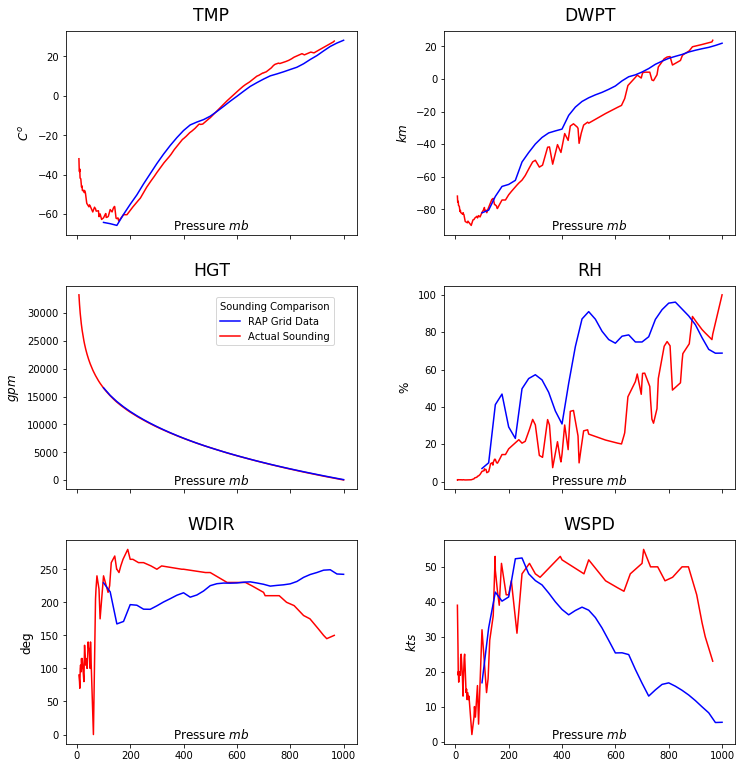

In [11]:
snds[6]
sounding_comparison(unitdict, simdicts[6], spcdicts[6])

In [12]:
spcprofs = [sharppyprof(spcdicts[x]) for x in range(len(spcdicts) )]
simprofs = [sharppyprof(simdicts[x]) for x in range(len(simdicts) )]

In [32]:


def plotsounding2(prof, parcel, title, fig, ax, extra = ''):
    name, ylabel, xlabel = '', 'P (mb)', 'T (C)'
    pcltype = 0
    
    sfcpcl = params.parcelx( prof, flag=1 )
    mupcl = params.parcelx( prof, flag=3 )
    mlpcl = params.parcelx( prof, flag=4 )
    
    
    
    sfc = prof.pres[prof.sfc]
    p3km = interp.pres(prof, interp.to_msl(prof, 3000.))
    p6km = interp.pres(prof, interp.to_msl(prof, 6000.))
    p1km = interp.pres(prof, interp.to_msl(prof, 1000.))
    mean_3km = winds.mean_wind(prof, pbot=sfc, ptop=p3km)
    sfc_6km_shear = winds.wind_shear(prof, pbot=sfc, ptop=p6km)
    sfc_3km_shear = winds.wind_shear(prof, pbot=sfc, ptop=p3km)
    sfc_1km_shear = winds.wind_shear(prof, pbot=sfc, ptop=p1km)
    
    srwind = params.bunkers_storm_motion(prof)
    srh3km = winds.helicity(prof, 0, 3000., stu = srwind[0], stv = srwind[1])
    srh1km = winds.helicity(prof, 0, 1000., stu = srwind[0], stv = srwind[1])

    ship = params.ship(prof)
    eff_inflow = params.effective_inflow_layer(prof)
    ebot_hght = interp.to_agl(prof, interp.hght(prof, eff_inflow[0]))
    etop_hght = interp.to_agl(prof, interp.hght(prof, eff_inflow[1]))
    effective_srh = winds.helicity(prof, ebot_hght, etop_hght, stu = srwind[0], stv = srwind[1])
    ebwd = winds.wind_shear(prof, pbot=eff_inflow[0], ptop=eff_inflow[1])
    ebwspd = utils.mag( ebwd[0], ebwd[1] )
    
    scp = params.scp(mupcl.bplus, effective_srh[0], ebwspd)
    stp_cin = params.stp_cin(mlpcl.bplus, effective_srh[0], ebwspd, mlpcl.lclhght, mlpcl.bminus)
    stp_fixed = params.stp_fixed(sfcpcl.bplus, sfcpcl.lclhght, srh1km[0], 
                             utils.comp2vec(sfc_6km_shear[0], sfc_6km_shear[1])[1])

    scp = 0.0 if np.isnan(float(scp) ) else scp
    stp_cin = 0.0 if np.isnan(float(stp_cin) ) else stp_cin
    stp_fixed = 0.0 if np.isnan(float(stp_fixed) ) else stp_fixed
    
    
    indices = {'SBCAPE': [int(sfcpcl.bplus), 'J/kg'],\
           'SBCIN': [int(sfcpcl.bminus), 'J/kg'],\
           'SBLCL': [int(sfcpcl.lclhght), 'm AGL'],\
           'SBLFC': [int(sfcpcl.lfchght), 'm AGL'],\
           'SBEL': [int(sfcpcl.elhght), 'm AGL'],\
           'SBLI': [int(sfcpcl.li5), 'C'],\
           'MLCAPE': [int(mlpcl.bplus), 'J/kg'],\
           'MLCIN': [int(mlpcl.bminus), 'J/kg'],\
           'MLLCL': [int(mlpcl.lclhght), 'm AGL'],\
           'MLLFC': [int(mlpcl.lfchght), 'm AGL'],\
           'MLEL': [int(mlpcl.elhght), 'm AGL'],\
           'MLLI': [int(mlpcl.li5), 'C'],\
           'MUCAPE': [int(mupcl.bplus), 'J/kg'],\
           'MUCIN': [int(mupcl.bminus), 'J/kg'],\
           'MULCL': [int(mupcl.lclhght), 'm AGL'],\
           'MULFC': [int(mupcl.lfchght), 'm AGL'],\
           'MUEL': [int(mupcl.elhght), 'm AGL'],\
           'MULI': [int(mupcl.li5), 'C'],\
           '0-1 km SRH': [int(srh1km[0]), 'm2/s2'],\
           '0-1 km Shear': [int(utils.comp2vec(sfc_1km_shear[0], sfc_1km_shear[1])[1]), 'kts'],\
           '0-3 km SRH': [int(srh3km[0]), 'm2/s2'],\
           'Eff. SRH': [int(effective_srh[0]), 'm2/s2'],\
           'EBWD': [int(ebwspd), 'kts'],\
           'PWV': [round(params.precip_water(prof), 2), 'inch'],\
           'K-index': [int(params.k_index(prof)), ''],\
           'STP(fix)': [round(stp_fixed, 1), ''],\
           'SHIP': [round(ship, 1), ''],\
           'SCP': [round(scp, 1), ''],\
           'STP(cin)': [round(stp_cin, 1), '']}
    
    if parcel == 'SB':
        pcl = sfcpcl
        name = 'Surface Based'
    elif parcel == 'MU':
        pcl = mupcl
        name = 'Most Unstable'
    elif parcel == 'ML':
        pcl = mlpcl
        name = 'Mixed Layer'
    else:
        print("Invalid parcel type")
        
    if len(extra) > 0:
        name = name + '\n' + extra
        
    pad = 5 # in points
      
    ax.annotate(title, xy=(0.5, 0.), xytext=(0, pad),
                xycoords=ax.title, textcoords='offset points',
                size='large', ha='center', va='baseline');
    ax.annotate(name, xy=(0.8, 0.875), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline');
    ax.annotate(ylabel, xy=(0., 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='center', va='center', rotation=90);
    ax.annotate(xlabel, xy=(0.5, -0.2), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline');
    
    ax.grid(True)

    pmax = 1000
    pmin = 10
    dp = -10
    presvals = np.arange(int(pmax), int(pmin)+dp, dp)

    # plot the moist-adiabats
    for t in np.arange(-10,45,5):
        tw = []
        for p in presvals:
            tw.append(thermo.wetlift(1000., t, p))
        ax.semilogy(tw, presvals, 'k-', alpha=.2)



    # plot the dry adiabats
    for t in np.arange(-50,110,10):
        ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)
    
    #plt.title(' OAX 140616/1900 (Observed)', fontsize=14, loc='left')
    # Plot the data using normal plotting functions, in this case using
    # log scaling in Y, as dicatated by the typical meteorological plot
    ax.semilogy(prof.tmpc, prof.pres, 'r', lw=2)
    ax.semilogy(prof.dwpc, prof.pres, 'g', lw=2)
    ax.semilogy(pcl.ttrace, pcl.ptrace, 'k-.', lw=2)

    # An example of a slanted line at constant X
    ax.axvline(0, color='b', linestyle='--')
    ax.axvline(-20, color='b', linestyle='--')

    # Disables the log-formatting that comes with semilogy
    ax.yaxis.set_major_formatter(plt.ScalarFormatter());
    ax.set_yticks(np.linspace(100,1000,10));
    ax.set_ylim(1050,100);

    ax.xaxis.set_major_locator(plt.MultipleLocator(10));
    ax.set_xlim(-50,50);
    
    string = ''
    for key in np.sort(list(indices.keys() ) ):
        string = string + key + ': ' + str(indices[key][0]) + ' ' + indices[key][1] + '\n'
    ax.text(1.02, 1, string, verticalalignment='top', transform=plt.gca().transAxes)

albanyga


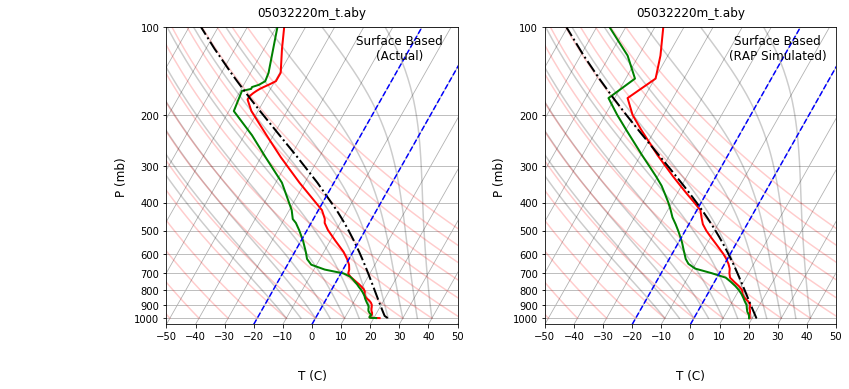

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, 
                         figsize=(2*6, 1*5), subplot_kw = dict(projection='skewx') )

print(soundings['loc'][1] )
plotsounding(spcprofs[1], 'SB', snds[1], fig, axes[0], extra = '(Actual)');
plotsounding(simprofs[1], 'SB', snds[1], fig, axes[1], extra = '(RAP Simulated)');

fig.subplots_adjust(wspace=0.3, hspace=0.25, top=0.95);

In [41]:
list(zip(features, np.around(sharpcalc(features, spcprofs[1]), ), np.around(sharpcalc(features, simprofs[1]) ) ) )

[('SBCAPE', 2257.0, 424.0),
 ('SBCIN', 0.0, -71.0),
 ('SBLCL', 150.0, 27.0),
 ('SBLFC', 150.0, 2218.0),
 ('SBEL', 12928.0, 10590.0),
 ('SBLI', -7.0, -3.0),
 ('MLCAPE', 780.0, 778.0),
 ('MLCIN', -30.0, -26.0),
 ('MLLCL', 483.0, 525.0),
 ('MLLFC', 2053.0, 1540.0),
 ('MLEL', 11404.0, 11413.0),
 ('MLLI', -4.0, -4.0),
 ('MUCAPE', 2257.0, 1135.0),
 ('MUCIN', 0.0, -3.0),
 ('MULCL', 150.0, 1062.0),
 ('MULFC', 150.0, 1390.0),
 ('MUEL', 12928.0, 12170.0),
 ('MULI', -7.0, -5.0),
 ('0-1 km SRH', 368.0, 311.0),
 ('0-1 km Shear', 39.0, 37.0),
 ('0-3 km SRH', 418.0, 362.0),
 ('Eff. SRH', 423.0, 357.0),
 ('EBWD', 44.0, 43.0),
 ('PWV', 2.0, 1.0),
 ('K-index', 37.0, 33.0),
 ('STP(fix)', 6.0, 1.0),
 ('SHIP', 1.0, 1.0),
 ('SCP', 19.0, 8.0),
 ('STP(cin)', 2.0, 2.0)]

In [ ]:
list(zip(features, np.around(sharpcalc(features, spcprofs[1]), ), np.around(sharpcalc(features, simprofs[1]) ) ) )